Произведем ипорт необходимых библиотек.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Рассмотрим функции.

In [2]:
def f_x(x):
    y = x**2 - 4 * x - (x - 2) * np.log(x - 1)
    return y

def deriv(x,y):
    x_ = np.zeros((len(x)-1), dtype=np.longdouble)
    y_ = np.zeros((len(x)-1), dtype=np.longdouble)
    for i in range(len(x)-1):
        x_[i] = (x[i+1]+x[i])/2.0
        y_[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
    return x_, y_

Обозначим константы, сформируем точки, найдем ненулевую производную i-го порядка и построим график.

Производная "3.1564958771213573e-06" 1-го порядка
Производная "0.007495838463815563" 2-го порядка
Производная "3.000094703939679" 3-го порядка
x_0 - Точка возрастания


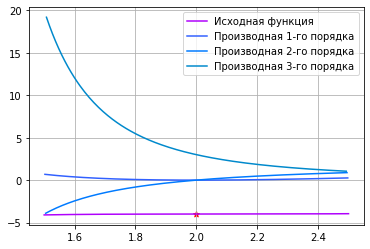

In [3]:
cols =['#af00fc','#3160ff','#007aff','#0089cc','#008bb9','#008ba7']
dx = 1e-2
x0 = float(2)
y0 = f_x(x0)
x = np.linspace(x0 - 0.5, x0 + 0.5, 200)
y = f_x(x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(x, y, linewidth=1.5, color=cols[0], label=f'Исходная функция')
ax.scatter(x0, y0, linewidth=1, color='red', marker='*')

xder, yder = x, y
i, der = 0, 0
while round(der, 1) == 0:
    i += 1
    xder, yder = deriv(xder, yder)
    ax.plot(xder, yder, linewidth=1.5, color=cols[i], label=f'Производная {i}-го порядка')
    der = yder[len(yder)//2]
    print(f'Производная "{der}" {i}-го порядка')

if (i % 2 == 0) and (der > 0): print('x_0 - Локальный минимум')
elif (i % 2 == 0) and (der < 0): print('x_0 - Локальный максимум')
elif (der < 0): print('x_0 - Точка убывания')
else: print('x_0 - Точка возрастания')
ax.legend()
plt.show()